<a href="https://colab.research.google.com/github/saikirankesoju/Data-Mining/blob/main/lab-5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   103 non-null    float64
dtypes: float64(1)
memory usage: 956.0 bytes
None

Summary Statistics:
            Value
count  103.000000
mean    51.321878
std     16.417675
min     23.802549
25%     44.185369
50%     49.279899
75%     55.279137
max    140.000000

Missing Values:
Value    0
dtype: int64


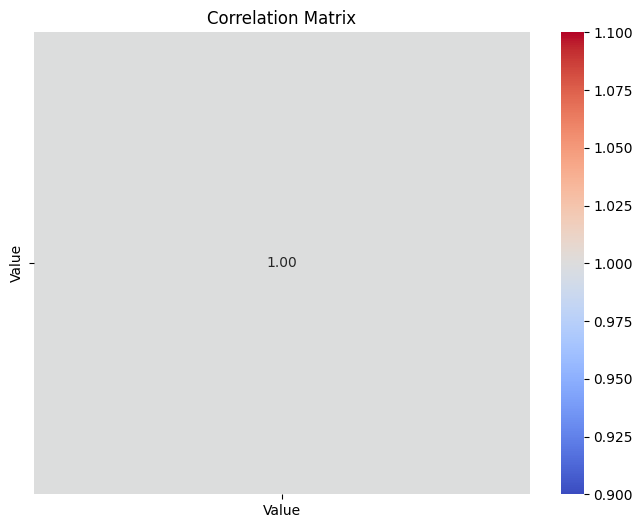

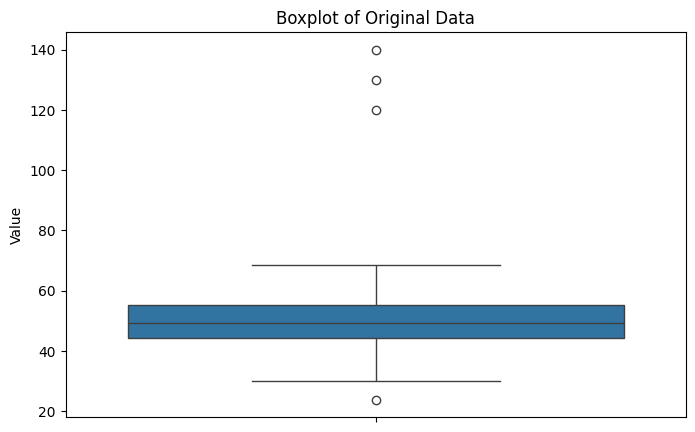

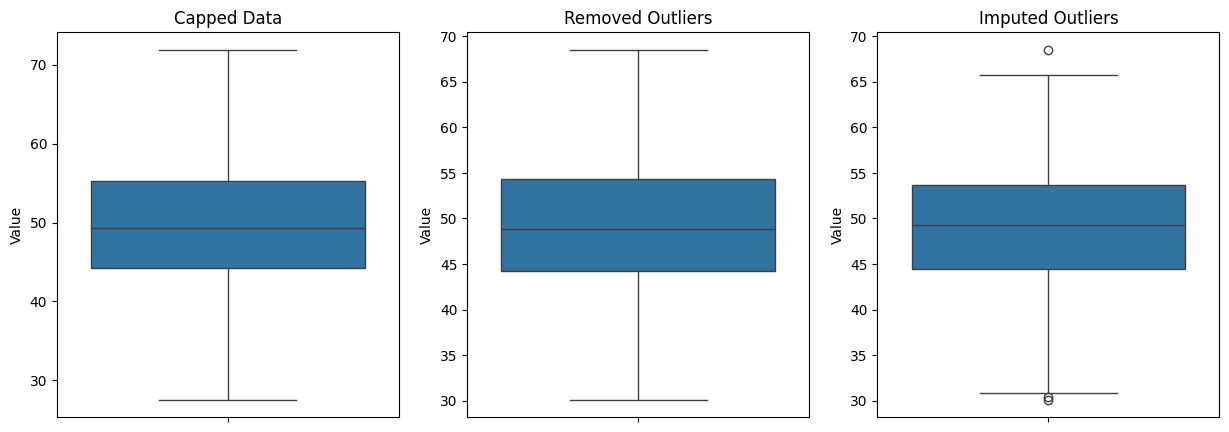

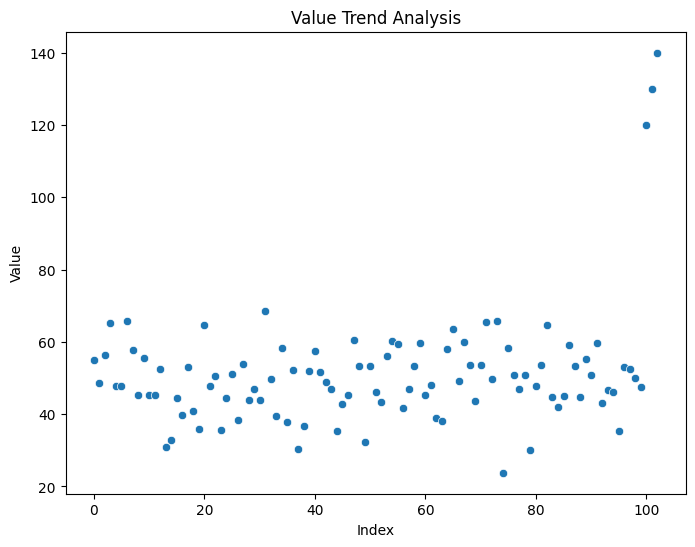

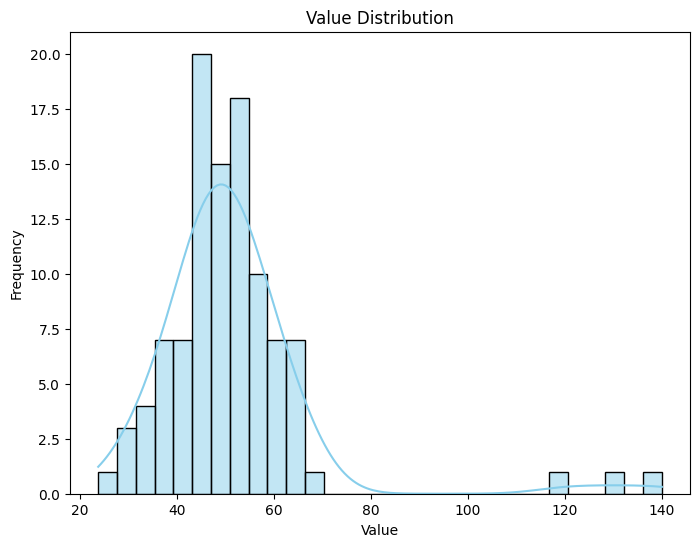

Outliers detected using IQR Method:
          Value
74    23.802549
100  120.000000
101  130.000000
102  140.000000

Outliers detected using Z-Score Method:
     Value
100  120.0
101  130.0
102  140.0


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Generate synthetic data
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=100)
# Add artificial outliers
data = np.append(data, [120, 130, 140])

# Convert to DataFrame
df = pd.DataFrame(data, columns=['Value'])

# Exploratory Data Analysis (EDA)
# Data Overview
print("Dataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

# Correlation Analysis
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix')
plt.show()

# Detecting Outliers using IQR Method
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
iqr_outliers = df[(df['Value'] < lower_bound) | (df['Value'] > upper_bound)]

# Detecting Outliers using Z-Score Method
z_scores = np.abs(stats.zscore(df['Value']))
z_score_outliers = df[z_scores > 3]

# Visualization - Boxplot before handling outliers
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Value'])
plt.title('Boxplot of Original Data')
plt.show()

# Handling Outliers
# Capping
df_capped = df.copy()
df_capped['Value'] = np.where(df['Value'] > upper_bound, upper_bound, df['Value'])
df_capped['Value'] = np.where(df_capped['Value'] < lower_bound, lower_bound, df_capped['Value'])

# Removal
df_removed = df[(df['Value'] >= lower_bound) & (df['Value'] <= upper_bound)]

# Imputation (Replacing outliers with median)
median_value = df['Value'].median()
df_imputed = df.copy()
df_imputed.loc[(df['Value'] < lower_bound) | (df['Value'] > upper_bound), 'Value'] = median_value

# Visualization - Boxplots after handling outliers
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(y=df_capped['Value'], ax=axes[0])
axes[0].set_title('Capped Data')
sns.boxplot(y=df_removed['Value'], ax=axes[1])
axes[1].set_title('Removed Outliers')
sns.boxplot(y=df_imputed['Value'], ax=axes[2])
axes[2].set_title('Imputed Outliers')
plt.show()

# Additional EDA Visualizations
# Scatter plot to analyze trends
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df.index, y=df['Value'])
plt.title('Value Trend Analysis')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

# Histogram for distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Value'], bins=30, kde=True, color='skyblue')
plt.title('Value Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Print detected outliers
print("Outliers detected using IQR Method:")
print(iqr_outliers)
print("\nOutliers detected using Z-Score Method:")
print(z_score_outliers)